# Wrangle and Analyze Data


<a id = 'top'></a>
## Table of Contents
1. [Introduction](#intro)<br>
2. [Wrangle data](#wrangle)<br>
    2.1 [Gather Data](#gather)<br>
    2.2 [Assess Data](#assess)<br>
    2.2.1. [Visual Assessment](#visual)<br>
    2.2.2. [Programmatic Assessment](#programmatic)<br>
    2.3. [Clean Data](#clean)<br>
3. [Storing Data](#storing)<br>
4. [Analyze and Visualize Data](#analysis)<br>
5. [Resources](#resources)<br>




## 1. Introduction <a id = 'intro'></a>
This project is based on Twitter user - WeRateDogs. This twitter account rates individuals dogs with funny comments about the dogs. There is a lot of data available for investigation and visualization. But before that we need to perform gathering, assessing and cleaning of data.

In [333]:
import requests
import os
import numpy as np
import pandas as pd
import tweepy

import matplotlib.pyplot as plt
import warnings
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

[Go to top](#top)<br>

## 2. Wrangle data <a id = 'wrangle'></a>
In this project, we will be performing three steps to wrangle data. They are gather, assess and clean data. This needs to be done so that our data is good enough to perform analysis and we can interpret our data correctly

### 2.1 Gather data <a id = 'gather'></a>
I have been provided different kinds of data. Below are the details of the data available
1. Twitter Archive - The archive file contains basic tweet data such as the tweet ID, text, timestamp and so on for more than 5000 of their tweets
2. Image prediction file - This file contains the image prediction of what breed the dog or the object could be in each tweet through neural networks.
3. Tweet API - Using, the tweet ID's in WeRateDogs, twitter API is used to query each tweet's JSON data and the entire set of JSON data is stored in 'tweet_json.txt'. This file is the read into a pandas DataFrame.

In [2]:
#Loading first kind of data - csv file
df_enhanced_twitter = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
#Image predictions from the URL and read the tsv file
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)
response

<Response [200]>

In [4]:
#Writing the contents of the file from bytes format to human readable text
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
#Reading the tab seperated file
df_image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
#Authentication for twitter API
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

Below code resource - https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [7]:
#This part of the code was used from - https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for each_id in df_enhanced_twitter['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(each_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(each_id)

Rate limit reached. Sleeping for: 729
Rate limit reached. Sleeping for: 726


In [8]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [9]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [10]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count)
                            })
        df_tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])


[Go to top](#top)<br>

## 2.2 Assess Data <a id = 'assess'></a>
Once, the data is gathered, perform assessment to check the quality and tidiness of the data. I will be performing assessment in two ways. First, visual assessment by just looking at our datasets and then programmatic assessment. While performing the assessment, all the issues shall be noted down as quality or tidiness issues.

### 2.2.1 Visual Assessment
Here, I will be looking at the dataframe by scrolling through the data to observe the data quality issues

In [48]:
df_enhanced_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [49]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [50]:
df_tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35908,7624
1,892177421306343426,30982,5644
2,891815181378084864,23309,3736
3,891689557279858688,39189,7790
4,891327558926688256,37440,8392
5,891087950875897856,18863,2813
6,890971913173991426,10958,1830
7,890729181411237888,60486,17020
8,890609185150312448,25962,3872
9,890240255349198849,29651,6622


#### Quality Issues
##### df_enhanced_twitter
1. Missing data or NaN values in 'in_reply_to_status_id', 'in_reply_to_user_id'
2. Remove retweets columns and keep originals - 'retweeted_status_id',retweeted_status_user_id','retweeted_status_timestamp'
3. Columns 'name','doggo','fluffer','pupper' and 'puppo' have values as 'None' instead of 'NaN'
4. 'source' column is HTML with a tag 
5. Multiple links and missing data in 'expanded_urls' column
6. 'a', 'the','an' as the name of a dog for index = 57
7. Inaccurate dog ratings - Multiple entries with decimal numerator ratings are incorrect. For example, an entry has numerator rating 13.5 but is wrongly entered as 5
8. Ratings for multiple dogs considered instead of each dog. For example, an entry has rating 99/90 as there are 9 dogs.
9. Manually changed wrong ratings of Darrel, Charles
10. 'a', an, 'the' as dog names
11. Some index have entries for both 'doggo' and 'flooffer' or 'doggo' and 'pupper'or 'doggo' and 'puppo' 

#### df_image_prediction
12. Lower case and upper case used with '_' in dog prediction

#### Tidiness Issues
##### df_enhanced_twitter
1. Columns 'doggo', 'fluffer', 'pupper', 'puppo' are different columns and can be made as a single column.
2. Create a new column called 'rating_ratio'

#### df_image_prediction
3. This dataset can be part of df_enhanced_twitter table
4. Create a single column with the true prediction of dog breed based on the 10% confidence level

#### df_tweet_json
5. This dataset can be part of df_enhanced_twitter table

[Go to top](#top)<br>

### 2.2.2. Programmatic Assessment
I will be assessing the quality and tidines of data by looking for issues by running few lines of code

In [51]:
df_enhanced_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [52]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [54]:
df_tweet_json.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7500.775204,2676.312312
std,11643.021363,4525.445487
min,0.000000,1.000000
25%,1305.500000,542.000000
50%,3262.000000,1253.000000
75%,9185.500000,3112.000000
max,154855.000000,76922.000000


In [55]:
len(df_enhanced_twitter[df_enhanced_twitter.tweet_id.duplicated()])

0

In [56]:
len(df_image_prediction[df_image_prediction.tweet_id.duplicated()])

0

In [57]:
len(df_image_prediction[df_image_prediction.jpg_url.duplicated()])

66

In [58]:
len(df_tweet_json[df_tweet_json.tweet_id.duplicated()])

0

In [59]:
df_enhanced_twitter.doggo.value_counts(), df_enhanced_twitter.floofer.value_counts(),df_enhanced_twitter.pupper.value_counts(), df_enhanced_twitter.puppo.value_counts(),  

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [60]:
df_enhanced_twitter.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
an           7
Bailey       7
Buddy        7
Daisy        7
Scout        6
Rusty        6
Koda         6
Oscar        6
Jack         6
Bella        6
Leo          6
Dave         6
Stanley      6
Jax          6
Milo         6
Sunny        5
          ... 
Hall         1
Ulysses      1
Autumn       1
Craig        1
Tupawc       1
Lupe         1
Chuq         1
Livvie       1
Wesley       1
Siba         1
Farfle       1
Tug          1
Arlen        1
Monkey       1
Hazel        1
Samsom       1
Julius       1
Brian        1
Maude        1
Dewey        1
Ferg         1
Mookie       1
Glenn        1
Flash        1
Grady        1
Luther       1
Erik         1
Opie         1
Benny        1
Vinnie       1
Name: name, Length: 957, dtype: int64

In [61]:
df_lower = df_enhanced_twitter.name.str.islower()


In [62]:
df_enhanced_twitter[df_lower].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
not              2
getting          2
actually         2
mad              2
such             1
this             1
space            1
by               1
incredibly       1
light            1
old              1
life             1
unacceptable     1
infuriating      1
all              1
my               1
officially       1
his              1
Name: name, dtype: int64

In [63]:
df_image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [64]:
df_tweet_json.favorite_count.value_counts()

0        163
293        4
2629       3
1055       3
3357       3
1063       3
718        3
3192       3
1562       3
3223       3
1755       3
1865       3
316        3
4368       3
3262       3
2365       2
2923       2
4080       2
1691       2
2791       2
5195       2
3134       2
3118       2
242        2
7194       2
6965       2
2919       2
3048       2
3044       2
3240       2
        ... 
629        1
2676       1
627        1
625        1
35700      1
14916      1
581        1
6728       1
25163      1
4685       1
591        1
593        1
27220      1
597        1
19030      1
2648       1
601        1
2650       1
2654       1
4703       1
2658       1
45671      1
2664       1
4332       1
619        1
729        1
12909      1
4719       1
5839       1
2006       1
Name: favorite_count, Length: 1993, dtype: int64

In [65]:
df_tweet_json['retweet_count'].value_counts()

452      6
687      5
567      5
1029     5
451      5
222      4
211      4
284      4
808      4
729      4
2010     4
516      4
84       4
552      4
445      4
989      4
944      4
52       4
221      4
32       4
1742     4
499      3
596      3
493      3
1128     3
518      3
485      3
3875     3
1015     3
558      3
        ..
2028     1
16369    1
2034     1
2036     1
2044     1
1        1
3        1
7        1
2056     1
11       1
2060     1
6108     1
1285     1
2000     1
6070     1
8077     1
3340     1
1291     1
1289     1
1199     1
10160    1
1976     1
1996     1
16313    1
4027     1
4033     1
541      1
4041     1
2186     1
13       1
Name: retweet_count, Length: 1679, dtype: int64

### Quality Issues
#### df_enhanced_twitter
13. 'timestamp' and 'retweeted_status_timestamp' type is object instead of timestamp
14. Datatype for 'rating_numerator' and 'rating_denominator' is instead of float
15. Dog names are not just 'a', 'an', 'the' as seen in visual assessment but there are other names also such as 'getting', 'mad', 'by', 'such', JD.. and so on

#### df_image_prediction
16. One of the image url is duplicate but the tweet_ids are different

#### df_tweet_json
17. 'tweet_id' type is object


### Tidiness issues
There are no tidiness issues identified programmatically. All tidiness issues have been identified visually



[Go to top](#top)<br>

## 2.3 Cleaning Data<a id = 'clean'></a>
I will be cleaning some of the issues that I listed in the above step. Not all the issues will be looked into. 
As a part of cleaning process, a copy of the datasets are made and cleaning operations will be carried out on these copied datasets.
Cleaning operations will contain define, code and test. We will try to clean missing data first, followed by tidiness issues and quality issues.

In [439]:
df_enhanced_clean = df_enhanced_twitter.copy()
df_image_clean = df_image_prediction.copy()
df_tweet_clean = df_tweet_json.copy()

In [440]:
df_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define - Code - Test
1. Remove columns that are not used - Missing data or NaN values in 'in_reply_to_status_id','in_reply_to_user_id'
2. Multiple links and missing data in 'expanded_urls' column
3. Remove retweeted row or duplicate rows
4. Columns 'doggo', 'fluffer', 'pupper', 'puppo' are different columns and can be made as a single column.
5. Columns 'name','doggo','flooffer','pupper' and 'puppo' have values as 'None' instead of 'NaN'
6. tweet_id' type is object instead of float in twitter json table
7. timestamp' and 'retweeted_status_timestamp' type is object instead of timestamp in twitter archive table
8. Datatype for 'rating_numerator' and 'rating_denominator' is object instead of float in twitter archive table
9. df_image_prediction can be part of df_enhanced_twitter table
10. df_tweet_json can be part of df_enhanced_twitter table
11. Dog names such as 'a', 'an', 'the' , 'getting', 'mad', 'by', 'such'.. need to be replaced with NaN values
12. Inaccurate dog ratings - Multiple entries with decimal numerator ratings are incorrect. For example, an entry has numerator rating 13.5 but is wrongly entered as 5
13. Manually changed wrong ratings Darrel, Charles
14. Create a column 'rating_ratio'
15. Remove retweets columns - 'retweeted_status_id',  retweeted_status_user_id', 'retweeted_status_timestamp' and other columns
16. 'source' column is HTML with a tag
17. Create a single prediction column based on True condition and 10% confidence level
18. Lower case and upper case used in dog predicted breed

#### Define - Missing Data
1. Remove columns that are not used - Missing data or NaN values in 'in_reply_to_status_id','in_reply_to_user_id'

Also, remove below column as it is not useful
2. Multiple links and missing data in 'expanded_urls' column 


#### Code

In [441]:
#Since the above columns have missing data and the columns are not of much use,they will be removed from the dataset
df_enhanced_clean = df_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','expanded_urls'], axis = 1)



#### Test

In [442]:
df_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [443]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


#### Define - Quallity Issue
3. Remove retweeted rows or duplicate rows

#### Code

In [444]:
df_enhanced_clean = df_enhanced_clean[df_enhanced_clean.retweeted_status_id.isnull()]

#### Test

In [445]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define - Tidiness & Quality
In df_enhanced_clean
4. Columns 'doggo', 'fluffer', 'pupper', 'puppo' are different columns and can be made as a single column.
5. Columns 'name','doggo','flooffer','pupper' and 'puppo' have values as 'None' instead of 'NaN'

#### Code


In [446]:
#Converting doggo, floofer, pupper and puppo into a single column called dog stage
df_enhanced_clean['doggo'].replace('None', '',inplace = True)
df_enhanced_clean['floofer'].replace('None','',inplace = True)
df_enhanced_clean['pupper'].replace('None', '',inplace = True)
df_enhanced_clean['puppo'].replace('None','', inplace = True)

In [447]:
#Creating column dog phase and deleting duplicates
df_enhanced_clean = pd.melt(df_enhanced_clean, id_vars = ['tweet_id', 'timestamp','source','text','retweet_status_id','retweet_status_user_id','retweet_status_timestamp','rating_numerator','rating_denominator','name'],
                           value_vars = ['doggo', 'floofer', 'pupper','puppo'],
                            var_name = 'dogs', value_name = 'dog_phase')


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [448]:
df_enhanced_clean = df_enhanced_clean.drop(['dogs'], axis = 1)

In [449]:
df_enhanced_clean = df_enhanced_clean.sort_values('dog_phase').drop_duplicates(subset ='tweet_id', keep = 'last')

#### Test

In [450]:
df_enhanced_clean.dog_phase.value_counts()

           1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_phase, dtype: int64

In [451]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 11 columns):
tweet_id                    2175 non-null int64
timestamp                   2175 non-null object
source                      2175 non-null object
text                        2175 non-null object
retweet_status_id           0 non-null float64
retweet_status_user_id      0 non-null float64
retweet_status_timestamp    0 non-null float64
rating_numerator            2175 non-null int64
rating_denominator          2175 non-null int64
name                        2175 non-null object
dog_phase                   2175 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 203.9+ KB


#### Define - Quality Issues in table image prediction
6. tweet_id' type is object instead of float

#### Code


In [452]:
#Converting datatype of 'tweet_id' in df_tweet_clean table from object to int64
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype('int64')

#### Test

In [453]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define - Quality Issues in table twitter archive

7. timestamp' and 'retweeted_status_timestamp' type is object instead of timestamp
8. Datatype for 'rating_numerator' and 'rating_denominator' is object instead of float 

#### Code

In [454]:
#Converting datatype of 'timestamp' and 'retweeted_status_timestamp' in df_enhanced_twitter from object to timestamp
df_enhanced_clean.timestamp =pd.to_datetime(df_enhanced_clean.timestamp)
df_enhanced_clean.retweet_status_timestamp=pd.to_datetime(df_enhanced_clean.retweet_status_timestamp)

In [455]:
#Convert datatype of 'rating_numerator' and 'rating_denominator' from int64 to float
df_enhanced_clean.rating_numerator = df_enhanced_clean.rating_numerator.astype(float)
df_enhanced_clean.rating_denominator = df_enhanced_clean.rating_denominator.astype(float)

#### Test

In [456]:
df_enhanced_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 11 columns):
tweet_id                    2175 non-null int64
timestamp                   2175 non-null datetime64[ns]
source                      2175 non-null object
text                        2175 non-null object
retweet_status_id           0 non-null float64
retweet_status_user_id      0 non-null float64
retweet_status_timestamp    0 non-null datetime64[ns]
rating_numerator            2175 non-null float64
rating_denominator          2175 non-null float64
name                        2175 non-null object
dog_phase                   2175 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 203.9+ KB


In [457]:
df_enhanced_clean.sample(2)

,tweet_id,timestamp,source,text,retweet_status_id,retweet_status_user_id,retweet_status_timestamp,rating_numerator,rating_denominator,name,dog_phase
3081,738402415918125056,2016-06-02 16:10:29,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaT,10.0,10.0,None,
2401,842535590457499648,2017-03-17 00:38:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaT,13.0,10.0,Winnie,


#### Define - Tidiness Issues 
9. df_image_prediction can be part of df_enhanced_twitter table
10. df_tweet_json can be part of df_enhanced_twitter table

#### Code

Code resource - https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

In [458]:
#I will be merging the tables df_image_clean and df_tweet_clean to df_enhanced_clean
from functools import reduce 
df = [df_enhanced_clean, df_image_clean, df_tweet_clean]
df_master_clean = reduce (lambda left, right: pd.merge(left,right,on = 'tweet_id'),df)

#### Test

In [459]:
df_master_clean.head(5)

,tweet_id,timestamp,source,text,retweet_status_id,retweet_status_user_id,retweet_status_timestamp,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,NaN,NaN,NaT,6.0,10.0,None,...,0.980815,False,drake,0.006918,False,hen,0.005255,False,745,541
1,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,NaN,NaN,NaT,11.0,10.0,Cupcake,...,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,297,84
2,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,NaN,NaN,NaT,7.0,10.0,Reese,...,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,181,56
3,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,NaN,NaN,NaT,11.0,10.0,a,...,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True,243,90
4,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,NaN,NaN,NaT,7.0,10.0,None,...,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,500,211


In [460]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
tweet_id                    1987 non-null int64
timestamp                   1987 non-null datetime64[ns]
source                      1987 non-null object
text                        1987 non-null object
retweet_status_id           0 non-null float64
retweet_status_user_id      0 non-null float64
retweet_status_timestamp    0 non-null datetime64[ns]
rating_numerator            1987 non-null float64
rating_denominator          1987 non-null float64
name                        1987 non-null object
dog_phase                   1987 non-null object
jpg_url                     1987 non-null object
img_num                     1987 non-null int64
p1                          1987 non-null object
p1_conf                     1987 non-null float64
p1_dog                      1987 non-null bool
p2                          1987 non-null object
p2_conf                     1987 non-null float64
p2

#### Define - Quality Issues
11. Dog names such as 'a', 'an', 'the' , 'getting', 'mad', 'by', 'such'.. need to be replaced with NaN values

#### Code

In [461]:
# Replace all 'none','a','an','the','getting'.. dog names with 'NaN'
df_lowercase = df_master_clean.name[df_master_clean.name.str.islower()].unique()
df_master_clean.name = df_master_clean.name.replace(df_lowercase, np.nan)



In [462]:
df_master_clean.name = df_master_clean.name.replace('None',np.nan)

#### Test

In [463]:
df_master_clean.name.value_counts()

Oliver          10
Charlie         10
Cooper          10
Penny            9
Lucy             9
Tucker           9
Winston          8
Sadie            8
Toby             7
Lola             7
Daisy            7
Koda             6
Jax              6
Bella            6
Stanley          6
Bo               6
Milo             5
Louis            5
Oscar            5
Chester          5
Bailey           5
Rusty            5
Scout            5
Buddy            5
Dave             5
Leo              5
Larry            4
Gus              4
Finn             4
Chip             4
                ..
Reptar           1
Milky            1
Brockly          1
Randall          1
Reagan           1
Freddery         1
Rinna            1
Lupe             1
Odin             1
Rocco            1
Superpup         1
Staniel          1
Ralphie          1
Obi              1
Willie           1
Hero             1
Shakespeare      1
Dawn             1
Quinn            1
Tonks            1
Alexanderson     1
Dietrich    

In [464]:
df_master_clean.name.sample(5)

882       Ozzy
937    Chesney
99         NaN
526      Charl
475    Bubbles
Name: name, dtype: object

#### Define - Quality Issue
12. Inaccurate dog ratings - Multiple entries with decimal numerator ratings are incorrect. For example, an entry has numerator rating 13.5 but is wrongly entered as 5 

#### Code

In [465]:
df_master_clean.rating_numerator.unique()

array([  6.00000000e+00,   1.10000000e+01,   7.00000000e+00,
         9.00000000e+00,   1.20000000e+01,   8.00000000e+00,
         1.00000000e+01,   2.00000000e+00,   1.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
         1.30000000e+01,   1.40000000e+01,   4.40000000e+01,
         1.21000000e+02,   1.43000000e+02,   8.00000000e+01,
         9.90000000e+01,   4.50000000e+01,   5.00000000e+01,
         6.00000000e+01,   4.20000000e+02,   1.44000000e+02,
         2.60000000e+01,   8.80000000e+01,   2.40000000e+01,
         8.40000000e+01,   7.50000000e+01,   0.00000000e+00,
         1.65000000e+02,   1.77600000e+03,   2.04000000e+02,
         2.70000000e+01])

In [466]:
df_master_clean[df_master_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
195,This is Bella. She hopes her smile made you sm...,5.0
888,Here we have uncovered an entire battalion of ...,26.0
1153,"This is Logan, the Chow who lived. He solemnly...",75.0
1812,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0


In [467]:
df_master_clean.rating_numerator = df_master_clean.text.str.extract('((?:\d+\.)?\d+)', expand = True)

#### Test

In [468]:
df_master_clean[df_master_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
195,This is Bella. She hopes her smile made you sm...,13.5
888,Here we have uncovered an entire battalion of ...,11.26
1153,"This is Logan, the Chow who lived. He solemnly...",9.75
1812,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27


In [469]:
df_master_clean.rating_numerator.unique()

array(['6', '11', '7', '9', '12', '8', '10', '1', '2', '3', '4', '5', '13',
       '0', '8.98', '1949', '14', '150', '13.5', '80', '33', '31', '44',
       '121', '143', '2015', '97', '400', '45', '50', '60', '420', '100',
       '2003', '2016', '144', '11.26', '88', '24', '84', '9.75', '46',
       '98', '236', '17', '165', '2.0', '1776', '2002', '204', '47',
       '92.49', '11.27', '61'], dtype=object)

#### Define - Quality Issues
13. Manually changed wrong ratings for Darrel, Charles

#### Code

In [470]:
df_master_clean.loc[(df_master_clean.name=='Darrel'),['rating_numerator','rating_denominator']]=[10,10]

In [471]:
df_master_clean.loc[(df_master_clean['tweet_id']==730196704625098752), 'rating_numerator']=13


#### Test

In [472]:
df_master_clean[df_master_clean.name=='Darrel']

,tweet_id,timestamp,source,text,retweet_status_id,retweet_status_user_id,retweet_status_timestamp,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
336,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaT,10,10.0,Darrel,...,0.2786,False,Chihuahua,0.155207,True,loupe,0.153598,False,36349,16280


In [473]:
df_master_clean[df_master_clean.tweet_id==730196704625098752]

,tweet_id,timestamp,source,text,retweet_status_id,retweet_status_user_id,retweet_status_timestamp,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1601,730196704625098752,2016-05-11 00:43:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaT,13,10.0,Charles,...,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False,4768,1865


#### Define - Tidiness
14. Create rating_ratio column by dividing numerator by denominator

#### Code

In [474]:

df_master_clean['rating_ratio'] = (df_master_clean['rating_numerator'].astype('float')/df_master_clean['rating_denominator'].astype('float'))

#### Test

In [475]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id                    1987 non-null int64
timestamp                   1987 non-null datetime64[ns]
source                      1987 non-null object
text                        1987 non-null object
retweet_status_id           0 non-null float64
retweet_status_user_id      0 non-null float64
retweet_status_timestamp    0 non-null datetime64[ns]
rating_numerator            1987 non-null object
rating_denominator          1987 non-null float64
name                        1343 non-null object
dog_phase                   1987 non-null object
jpg_url                     1987 non-null object
img_num                     1987 non-null int64
p1                          1987 non-null object
p1_conf                     1987 non-null float64
p1_dog                      1987 non-null bool
p2                          1987 non-null object
p2_conf                     1987 non-null float64
p2_

In [476]:
df_master_clean.rating_ratio.sample(5)

146     1.4
1372    1.3
211     1.1
1775    1.1
754     0.3
Name: rating_ratio, dtype: float64

#### Define - Quality Issues
15. Remove retweet and all unnecessary columns

#### Code

In [477]:
df_master_clean = df_master_clean.drop(['retweet_status_id','retweet_status_user_id','retweet_status_timestamp','rating_numerator','rating_denominator'], axis =1)

#### Test

In [478]:
df_master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'dog_phase',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'rating_ratio'],
      dtype='object')

#### Define - Quality Issue
16. 'source' column is HTML with a tag

#### Code

In [479]:
html_ref = df_master_clean.source.str.split('"',expand = True)

In [480]:
df_master_clean.source = html_ref[1]

#### Test

In [481]:
df_master_clean.source.sample(4)

1628    http://twitter.com/download/iphone
1568    http://twitter.com/download/iphone
877     http://twitter.com/download/iphone
1524    http://twitter.com/download/iphone
Name: source, dtype: object

#### Define - Tidiness and Quality Issue
17. Create a single prediction column based on True prediction condition and 10% confidence level

#### Code

In [482]:
predicted_breed =[]

def breed(df_master_clean):
    if df_master_clean['p1_dog'] == True and df_master_clean.p1_conf>=0.1:
        predicted_breed.append(df_master_clean.p1)
    elif df_master_clean['p2_dog'] == True and df_master_clean.p2_conf >=0.1:
        predicted_breed.append(df_master_clean.p2)
    elif df_master_clean['p3_dog'] == True and df_master_clean.p1_conf>=0.1:
        predicted_breed.append(df_master_clean.p3)
    else:
        predicted_breed.append(np.nan)
df_master_clean.apply(breed, axis =1)

df_master_clean['predicted_breed'] = predicted_breed


In [483]:
df_master_clean = df_master_clean[df_master_clean['predicted_breed']!= 'NaN']

In [484]:
#Remove all the unnecessary columns
df_master_clean = df_master_clean.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'],axis =1)

#### Test

In [485]:
df_master_clean.predicted_breed.value_counts()

golden_retriever              155
Labrador_retriever            107
Pembroke                       96
Chihuahua                      89
pug                            60
chow                           46
Samoyed                        42
toy_poodle                     42
Pomeranian                     42
malamute                       32
cocker_spaniel                 30
French_bulldog                 27
Chesapeake_Bay_retriever       26
miniature_pinscher             24
German_shepherd                22
Cardigan                       21
beagle                         21
Siberian_husky                 21
Shih-Tzu                       21
Staffordshire_bullterrier      21
Eskimo_dog                     21
kuvasz                         20
Maltese_dog                    19
Shetland_sheepdog              19
Lakeland_terrier               18
Italian_greyhound              17
Rottweiler                     17
Great_Pyrenees                 16
basset                         16
kelpie        

In [488]:
df_master_clean.sample(5)

,tweet_id,timestamp,source,text,name,dog_phase,jpg_url,img_num,favorite_count,retweet_count,rating_ratio,predicted_breed
561,706166467411222528,2016-03-05 17:16:20,http://twitter.com/download/iphone,This is Dexter. He's a shy pup. Doesn't bark m...,Dexter,,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,1,5094,1580,0.7,Samoyed
1377,826115272272650244,2017-01-30 17:10:04,http://twitter.com/download/iphone,This is Ike. He's demonstrating the pupmost re...,Ike,,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,15674,3116,1.3,kuvasz
601,671542985629241344,2015-12-01 04:14:59,http://twitter.com/download/iphone,"This is JD (stands for ""just dog""). He's like ...",JD,,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,1043,533,1.0,Shetland_sheepdog
189,881906580714921986,2017-07-03 16:04:48,http://twitter.com/download/iphone,This is Rey. He's a Benebop Cumberfloof. 12/10...,Rey,,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,22658,3073,1.2,Weimaraner
1828,677557565589463040,2015-12-17 18:34:46,http://twitter.com/download/iphone,Reckless pupper here. Not even looking at road...,NaN,pupper,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,2392,1122,1.0,Shih-Tzu


In [489]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 12 columns):
tweet_id           1987 non-null int64
timestamp          1987 non-null datetime64[ns]
source             1987 non-null object
text               1987 non-null object
name               1343 non-null object
dog_phase          1987 non-null object
jpg_url            1987 non-null object
img_num            1987 non-null int64
favorite_count     1987 non-null int64
retweet_count      1987 non-null int64
rating_ratio       1987 non-null float64
predicted_breed    1645 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 201.8+ KB


#### Define - Quality Issue
18. Maintain standard lowercase for dog predicted dog breed.

#### Code

In [490]:
df_master_clean.predicted_breed = df_master_clean.predicted_breed.str.lower()

#### Test

In [491]:
df_master_clean.predicted_breed.value_counts()

golden_retriever              155
labrador_retriever            107
pembroke                       96
chihuahua                      89
pug                            60
chow                           46
samoyed                        42
toy_poodle                     42
pomeranian                     42
malamute                       32
cocker_spaniel                 30
french_bulldog                 27
chesapeake_bay_retriever       26
miniature_pinscher             24
german_shepherd                22
cardigan                       21
shih-tzu                       21
beagle                         21
siberian_husky                 21
staffordshire_bullterrier      21
eskimo_dog                     21
kuvasz                         20
shetland_sheepdog              19
maltese_dog                    19
lakeland_terrier               18
rottweiler                     17
italian_greyhound              17
basset                         16
great_pyrenees                 16
old_english_sh

[Go to top](#top)<br>

## 4. Storing Data <a id = 'storing'></a>
After performing cleaning action, the cleaned dataset is stored to a csv file called 'twitter_archive_master.csv'

In [492]:
#Storing the cleaned dataset as twitter_archive_master
df_master_clean.to_csv('twitter_archive_master.csv', index = False)

[Go to top](#top)<br>

## 4. Analyze and Visualize Data <a id = 'analysis'></a>

In [493]:
df = pd.read_csv('twitter_archive_master.csv')

In [494]:
df.describe()

,tweet_id,img_num,favorite_count,retweet_count,rating_ratio
count,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,7.356264e+17,1.203322,8207.874182,2430.824862,1.824797
std,6.739210e+16,0.561369,12082.774670,4348.449732,11.703516
min,6.660209e+17,1.000000,70.000000,11.000000,0.000000
25%,6.758218e+17,1.000000,1763.500000,542.500000,1.000000
50%,7.083495e+17,1.000000,3718.000000,1180.000000,1.100000
75%,7.873602e+17,1.000000,10193.000000,2767.000000,1.200000
max,8.924206e+17,4.000000,154855.000000,76922.000000,201.600000


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 12 columns):
tweet_id           1987 non-null int64
timestamp          1987 non-null object
source             1987 non-null object
text               1987 non-null object
name               1343 non-null object
dog_phase          305 non-null object
jpg_url            1987 non-null object
img_num            1987 non-null int64
favorite_count     1987 non-null int64
retweet_count      1987 non-null int64
rating_ratio       1987 non-null float64
predicted_breed    1645 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 186.4+ KB


Which is the most retweeted dog phase?

From the below analysis, it can be observed that pupper is the most retweeted dog phase

In [496]:
df.groupby('dog_phase').retweet_count.count()

dog_phase
doggo       62
floofer      8
pupper     212
puppo       23
Name: retweet_count, dtype: int64

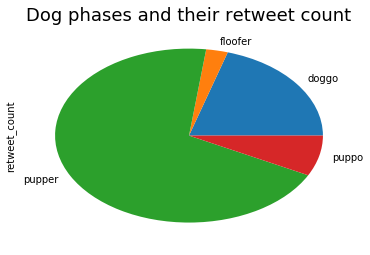

In [497]:
df.groupby('dog_phase').retweet_count.count().plot(kind = 'pie')
plt.plot(figsize = [10,3])
plt.title('Dog phases and their retweet count', fontsize = 18);


What are the 10 most predicted breeds in their dog phase - Pupper

The top 10 predicted breeds include golden retriever, labrador retriever,pug, chihuahua, pomeranian and poodle with golden retriever being the most predicted breed image in the pupper phase

In [498]:
pupper = df.query("dog_phase == 'pupper'")['predicted_breed'].sort_values(ascending = False).value_counts()[0:10]
pupper

golden_retriever      21
labrador_retriever    11
pembroke              10
pug                   10
pomeranian             8
chihuahua              7
lakeland_terrier       5
toy_poodle             5
shetland_sheepdog      4
samoyed                4
Name: predicted_breed, dtype: int64

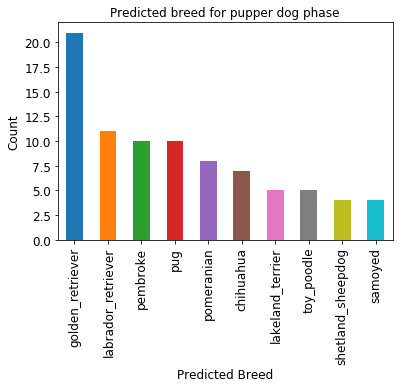

In [499]:
pupper.plot(x= 'predicted_breed', y = 'count',kind = 'bar', title ='Predicted breed for pupper dog phase', fontsize = 12);
plt.xlabel('Predicted Breed', fontsize = 12)
plt.ylabel('Count', fontsize = 12);


What is the relationship between favorite count and retweet count?

It seems like there is positive coorelation between favorite count and retweet count.

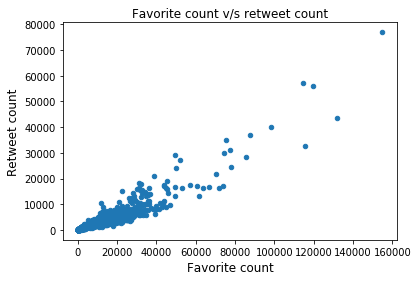

In [500]:
df.plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter', title = 'Favorite count v/s retweet count');
plt.xlabel('Favorite count', fontsize = 12)
plt.ylabel('Retweet count', fontsize = 12);

[Go to top](#top)<br>

## 5. Resources <a id = 'resources'></a>

1.  https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
2. https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

[Go to top](#top)<br>